# Sales Revenue Analytics Project


## 1. Project Overview

## 1. Project Overview

This project focuses on analyzing sales and revenue data to uncover key business insights related to profitability, discounting strategies, product performance, and sales trends over time.

The objective of this analysis is to demonstrate an end-to-end data analytics workflow, including data extraction, transformation, exploratory data analysis (EDA), visualization, and business decision-making.

Through this project, we aim to identify high-performing product categories, loss-making segments, the impact of discounts on profitability, and seasonal sales patterns that can help guide strategic business decisions.


## 2. Dataset Description

The dataset used in this project is the Superstore Sales dataset, which contains transactional-level sales data for a retail business.

- Each row represents a single product-level sales transaction.
- The dataset contains approximately 10,000 records and 21 columns.
- It includes information related to orders, customers, products, geography, and financial performance.

Key variables in the dataset include:
- Sales, Profit, Discount, and Quantity for financial analysis
- Product Category and Sub-Category for product-level insights
- Customer Segment and Region for segmentation analysis
- Order Date and Ship Date for time-series analysis

The dataset enables comprehensive analysis of revenue trends, profitability, discount impact, and product performance across multiple dimensions.

In [ ]:
import pandas as pd

df = pd.read_csv("Superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


### Dataset Understanding

- Each row represents a single product-level sales transaction.
- The dataset contains 9,994 transactions across 21 columns.
- Key business metrics include Sales, Profit, Quantity, and Discount.
- Time-based analysis is possible using Order Date and Ship Date.
- The data spans multiple regions, customer segments, and product categories.
- No missing values were found, simplifying the ETL process.
- Presence of negative profits indicates potential discount-driven losses.


## 3. ETL Process
### 3.1 Data Extraction
### 3.2 Data Transformation
### 3.3 Data Loading

In [ ]:
df_raw = df.copy()


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


errors='coerce'

If any date is messy, it becomes NaT instead of crashing. Then we can check if any became null.

In [ ]:
df[['Order Date','Ship Date']].isnull().sum()


,0
Order Date,0
Ship Date,0


In [ ]:
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month
df['order_month_name'] = df['Order Date'].dt.month_name()


In [ ]:
df['profit_margin'] = df['Profit'] / df['Sales']


In [ ]:
df['profit_margin'].describe()


,profit_margin
count,9994.000000
mean,0.120314
std,0.466754
min,-2.750000
25%,0.075000
50%,0.270000
75%,0.362500
max,0.500000


In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)


In [ ]:
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'order_year',
       'order_month', 'order_month_name', 'profit_margin'],
      dtype='object')

In [ ]:
import os
os.makedirs("../data/cleaned", exist_ok=True)


In [ ]:
df.to_csv("../data/cleaned/superstore_cleaned.csv", index=False)


In [ ]:
os.listdir("../data/cleaned")


['superstore_cleaned.csv']

In [ ]:
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()

total_sales, total_profit, total_orders, total_customers


(np.float64(2297200.8603000003), np.float64(286397.0217), 5009, 793)

### Key KPIs
- Total Sales: $2297200.86

- Total Profit: $286397.02
- Total Orders: 5009
- Total Customers: 793


## 4. Exploratory Data Analysis (EDA)
### 4.1 Key KPIs
### 4.2 Category & Sub-Category Analysis
### 4.3 Discount vs Profit Analysis
### 4.4 Time-Series Analysis

**Sales & Profit by Category**

In [ ]:
category_summary = (
    df.groupby('category')[['sales','profit']]
      .sum()
      .sort_values(by='sales', ascending=False)
)

In [ ]:
category_summary


,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


**Identifing Loss-Making Areas**

In [ ]:
loss_by_subcategory = (
    df.groupby('sub_category')['profit']
      .sum()
      .sort_values()
)


In [ ]:
loss_by_subcategory.head(5)

,profit
sub_category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569


**Monthly Sales Trend**

In [ ]:
monthly_sales = (
    df.groupby(['order_year','order_month'])['sales']
      .sum()
      .reset_index()
)

In [ ]:
monthly_sales.head()

,order_year,order_month,sales
0,2011,1,13946.229
1,2011,2,4810.558
2,2011,3,55691.009
3,2011,4,28295.345
4,2011,5,23648.287


**Discount vs Profit**

In [ ]:
df[['discount','profit']].corr()

,discount,profit
discount,1.000000,-0.219487
profit,-0.219487,1.000000


In [ ]:
df.groupby('discount')['profit'].mean()

,profit
discount,
0.00,66.900292
0.10,96.055074
0.15,27.288298
0.20,24.702572
0.30,-45.679636
0.32,-88.560656
0.40,-111.927429
0.45,-226.646464
0.50,-310.703456


### Exploratory Data Analysis Insights

- Technology is the highest-performing category in both sales and profit.
- Furniture generates high revenue but low profit, indicating margin issues.
- Tables and Bookcases are the largest loss-making sub-categories.
- Sales show noticeable monthly variation, suggesting seasonality.
- Discounting has a negative impact on profitability.
- Discounts above 30% consistently result in negative average profit.


## 5. Visualizations

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)


**Sales by Category**

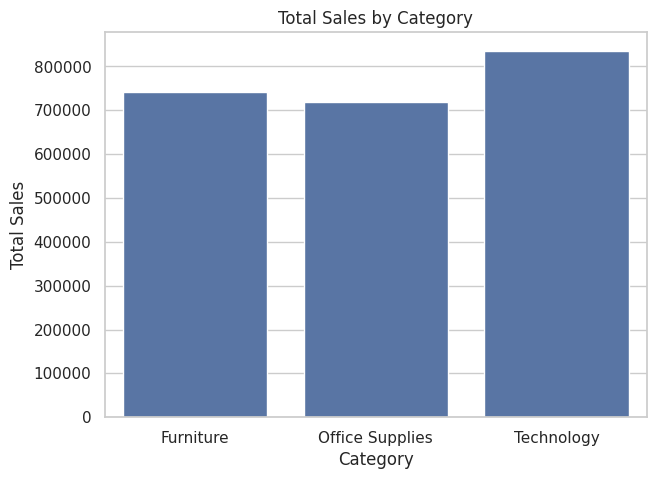

In [44]:
category_sales = df.groupby('category')['sales'].sum().reset_index()

sns.barplot(data=category_sales, x='category', y='sales')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


**Profit by Category**

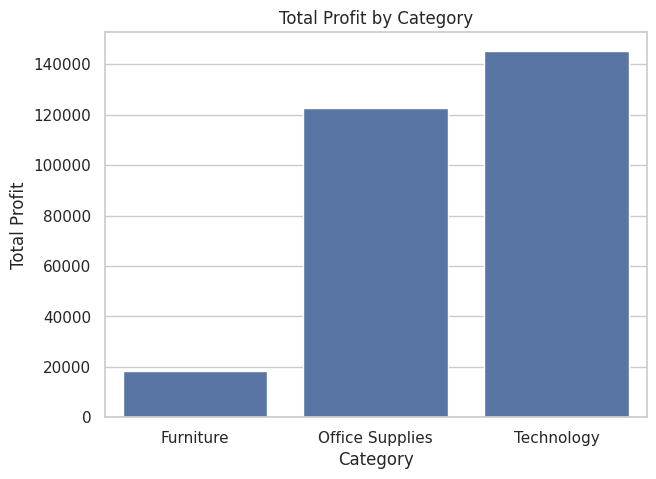

In [45]:
category_profit = df.groupby('category')['profit'].sum().reset_index()

sns.barplot(data=category_profit, x='category', y='profit')
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()


**Loss-Making Sub-Categories**

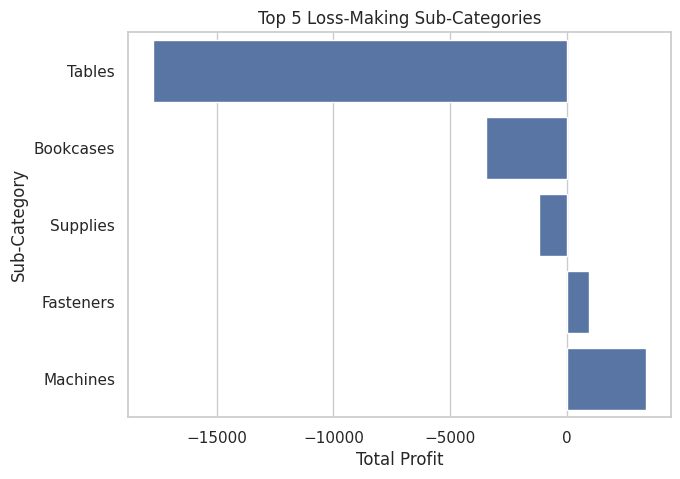

In [46]:
loss_subcat = (
    df.groupby('sub_category')['profit']
      .sum()
      .sort_values()
      .head(5)
      .reset_index()
)

sns.barplot(data=loss_subcat, x='profit', y='sub_category')
plt.title("Top 5 Loss-Making Sub-Categories")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()


**Monthly Sales Trend**

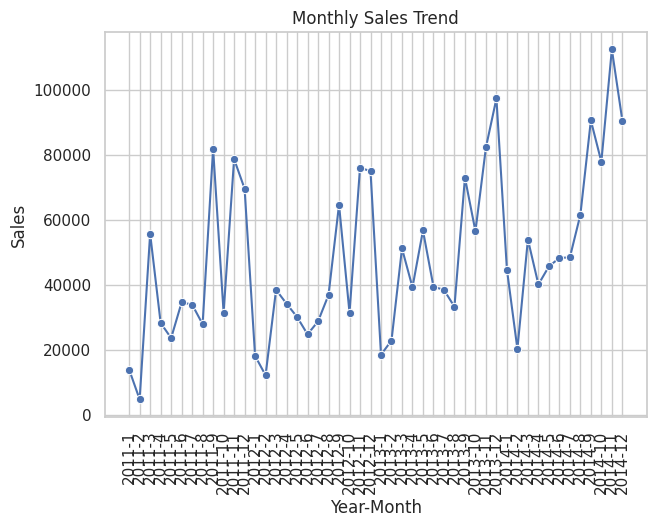

In [47]:
monthly_sales = (
    df.groupby(['order_year','order_month'])['sales']
      .sum()
      .reset_index()
)

monthly_sales['year_month'] = (
    monthly_sales['order_year'].astype(str) + "-" +
    monthly_sales['order_month'].astype(str)
)

sns.lineplot(data=monthly_sales, x='year_month', y='sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.show()


**Discount vs Profit**

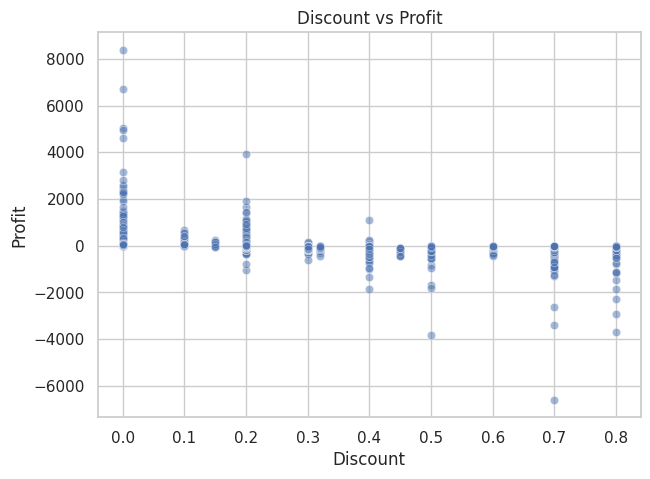

In [48]:
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


### Visualization Insights

- Technology leads in both total sales and profitability.
- Furniture shows weak profitability despite strong sales volume.
- Tables are the largest loss-making sub-category.
- Monthly sales trends indicate seasonality and growth over time.
- Higher discount levels are strongly associated with negative profit.


## 7. Conclusion

This analysis revealed several important insights into sales performance and profitability across different product categories and discount levels.

While Technology emerged as the most profitable category, Furniture showed weak margins despite strong sales volumes. Certain sub-categories, particularly Tables and Bookcases, consistently generated losses, indicating a need for pricing or cost-structure reassessment.

The analysis demonstrated a clear negative relationship between discount levels and profitability, with discounts above 30% frequently resulting in losses. Seasonal sales patterns were also observed, highlighting opportunities for better inventory planning and targeted promotions.

This project demonstrates how data-driven analysis can support strategic decision-making and highlights the importance of balancing revenue growth with profitability.